In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

df = pd.read_csv('AB_NYC_2019.csv')
len(df)

df.head()

--2021-09-24 18:31:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.6’

AB_NYC_2019.csv.6   100%[===================>]   6.75M  3.89MB/s    in 1.7s    

2021-09-24 18:32:00 (3.89 MB/s) - ‘AB_NYC_2019.csv.6’ saved [7077973/7077973]



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
base = ['neighbourhood_group', 'room_type', 'price', 'latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [4]:
df = df[base]
df.head().T

,0,1,2,3,4
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80
latitude,40.6475,40.7536,40.809,40.6851,40.7985
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,NaN,4.64,0.1
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0


## Make price binary

In [5]:
above_average = np.where(df.price >= 152, 1, 0)

In [6]:
above_average

array([0, 1, 0, ..., 0, 0, 0])

In [7]:
df['above_average'] = above_average
df.head()

,neighbourhood_group,room_type,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Private room,149,40.64749,-73.97237,1,9,0.21,6,365,0
1,Manhattan,Entire home/apt,225,40.75362,-73.98377,1,45,0.38,2,355,1
2,Manhattan,Private room,150,40.80902,-73.94190,3,0,NaN,1,365,0
3,Brooklyn,Entire home/apt,89,40.68514,-73.95976,1,270,4.64,1,194,0
4,Manhattan,Entire home/apt,80,40.79851,-73.94399,10,9,0.10,1,0,0


# Data prep

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['neighbourhood_group', 'room_type']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.head().T

,0,1,2,3,4
neighbourhood_group,brooklyn,manhattan,manhattan,brooklyn,manhattan
room_type,private_room,entire_home/apt,private_room,entire_home/apt,entire_home/apt
price,149,225,150,89,80
latitude,40.6475,40.7536,40.809,40.6851,40.7985
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,NaN,4.64,0.1
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0


In [12]:
df.dtypes

neighbourhood_group                object
room_type                          object
price                               int64
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
above_average                       int64
dtype: object

In [13]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
price                                 0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
above_average                         0
dtype: int64

In [14]:
df = df.fillna(0)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
above_average                     0
dtype: int64

In [15]:
df.neighbourhood_group.value_counts(normalize=True)

manhattan        0.443011
brooklyn         0.411167
queens           0.115881
bronx            0.022313
staten_island    0.007629
Name: neighbourhood_group, dtype: float64

In [16]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# Setting up the validation framework

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
len(df_full_train), len(df_test)

(39116, 9779)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [21]:
len(df_train), len(df_val)

(29337, 9779)

In [22]:
df_train

,neighbourhood_group,room_type,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
13575,brooklyn,entire_home/apt,99,40.72760,-73.94495,3,29,0.70,13,50,0
48476,manhattan,private_room,57,40.70847,-74.00498,1,0,0.00,1,7,0
44499,bronx,entire_home/apt,70,40.83149,-73.92766,40,0,0.00,1,0,0
17382,brooklyn,entire_home/apt,130,40.66448,-73.99407,2,3,0.08,1,0,0
14638,manhattan,private_room,110,40.74118,-74.00012,1,48,1.80,2,67,0
...,...,...,...,...,...,...,...,...,...,...,...
13198,brooklyn,private_room,50,40.71748,-73.95685,6,5,0.13,1,0,0
14583,brooklyn,private_room,125,40.66397,-73.98538,1,7,0.17,2,0,0
6168,manhattan,private_room,299,40.79994,-73.97001,1,1,0.64,1,88,1
12248,brooklyn,private_room,65,40.69585,-73.96344,60,0,0.00,1,0,0


In [23]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,neighbourhood_group,room_type,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,entire_home/apt,89,40.64354,-73.97777,3,62,0.71,1,189,0
1,queens,private_room,30,40.70666,-73.90779,21,0,0.00,1,73,0
2,manhattan,private_room,120,40.76116,-73.99016,2,17,0.43,1,0,0
3,manhattan,entire_home/apt,470,40.70763,-74.01050,2,5,1.88,327,272,1
4,manhattan,entire_home/apt,199,40.79658,-73.93287,2,30,0.80,1,30,1
...,...,...,...,...,...,...,...,...,...,...,...
9774,manhattan,entire_home/apt,215,40.72543,-73.99129,2,18,0.70,1,68,1
9775,manhattan,private_room,100,40.76352,-73.98280,1,0,0.00,6,294,0
9776,queens,private_room,70,40.75914,-73.83352,1,5,0.82,4,5,0
9777,manhattan,entire_home/apt,500,40.72179,-73.97951,2,0,0.00,1,0,1


In [24]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [25]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [30]:
del df_train['price']
del df_val['price']
del df_test['price']

## EDA

In [31]:
df_full_train = df_full_train.reset_index(drop=True)

In [32]:
df_full_train.above_average

0        1
1        0
2        0
3        0
4        0
        ..
39111    0
39112    0
39113    0
39114    0
39115    0
Name: above_average, Length: 39116, dtype: int64

In [33]:
df_full_train.dtypes

neighbourhood_group                object
room_type                          object
price                               int64
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
above_average                       int64
dtype: object

In [149]:
categorical = ['neighbourhood_group','room_type']
#'reviews_per_month'

In [150]:
numerical = ['latitude','longitude','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']

In [151]:
df_full_train[categorical].nunique()

neighbourhood_group    5
room_type              3
dtype: int64

## Correlation Matrix

In [37]:
corrMatrix = df.corr()
#print(corrMatrix)

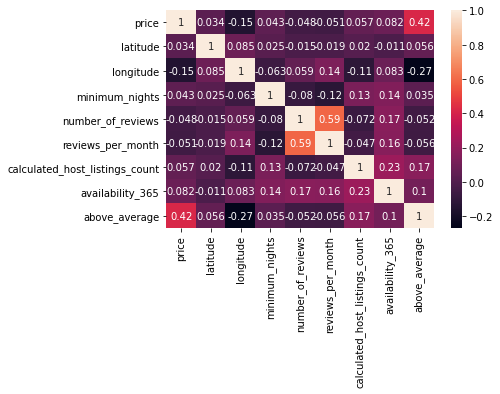

In [38]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Mutual Info

In [39]:
from sklearn.metrics import mutual_info_score

In [41]:
mutual_info_score(df_full_train.above_average, df_full_train.neighbourhood_group)

0.0462226506346477

In [42]:
mutual_info_score(df_full_train.above_average, df_full_train.room_type)

0.1423898076642953

## One-hot enconding

In [152]:
from sklearn.feature_extraction import DictVectorizer

In [153]:
df_train[['neighbourhood_group', 'room_type']].iloc[:100]

,neighbourhood_group,room_type
13575,brooklyn,entire_home/apt
48476,manhattan,private_room
44499,bronx,entire_home/apt
17382,brooklyn,entire_home/apt
14638,manhattan,private_room
...,...,...
6649,brooklyn,private_room
780,brooklyn,entire_home/apt
26447,brooklyn,entire_home/apt
4196,manhattan,entire_home/apt


In [154]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [155]:
dv = DictVectorizer(sparse=False)

In [156]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [157]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [158]:
list(dv.transform(train_dicts)[0])

[50.0,
 13.0,
 40.7276,
 -73.94495,
 3.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 29.0,
 1.0,
 0.0,
 0.0]

In [159]:
X_train = dv.fit_transform(train_dicts)

In [160]:
X_train.shape

(29337, 14)

In [161]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [162]:
X_val = dv.transform(val_dicts)

## Logistic regression

In [163]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## Training logistic regression with Scikit-Learn

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42, solver='liblinear')

In [166]:
model.coef_[0].round(3)

array([ 3.000e-03,  4.000e-03, -5.823e+00, -3.169e+00, -1.100e-02,
       -1.040e-01,  1.440e-01,  1.594e+00, -2.700e-02, -1.695e+00,
       -4.000e-03,  1.940e+00, -8.360e-01, -1.193e+00])

In [167]:
y_pred = model.predict_proba(X_val)[:, 1]

In [168]:
above_average_pred = (y_pred >= 0.5)

In [169]:
(y_val == above_average_pred).mean()
#full: 0.7904693731465385
#neighbourhood_group: 0.7498721750690255
#room_type: 0.7286021065548625
#number_of_reviews: 0.7915942325391144
#reviews_per_month: 0.7907761529808774

0.7907761529808774